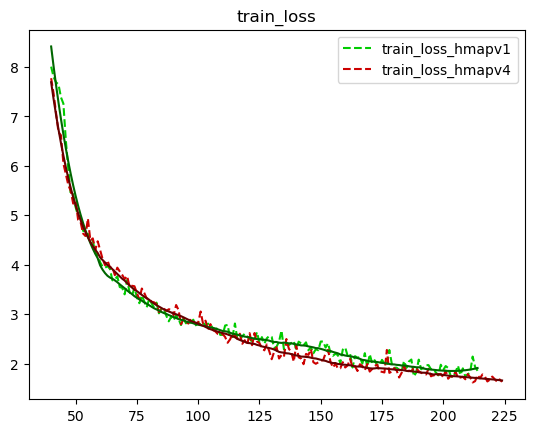

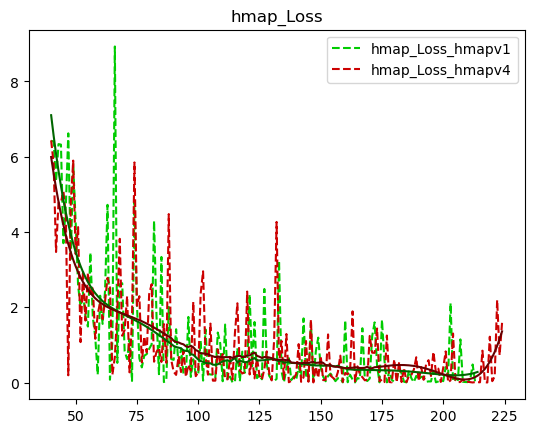

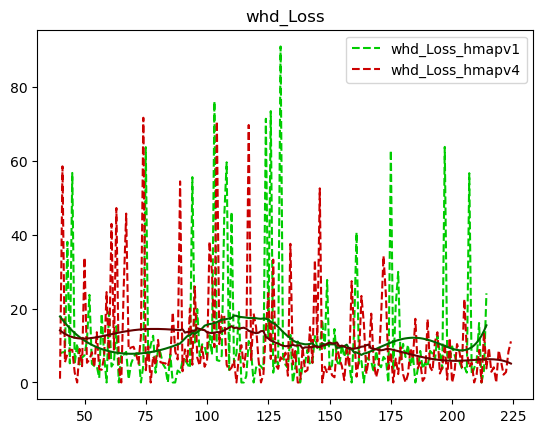

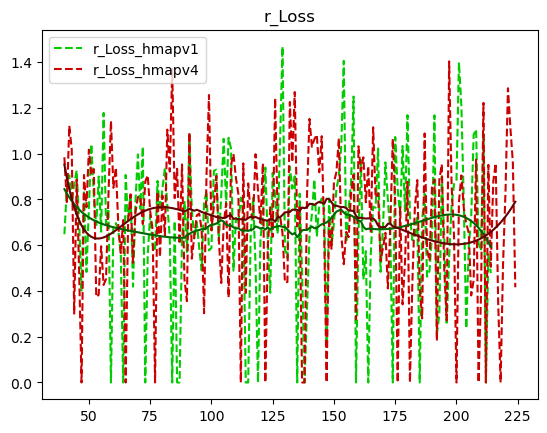

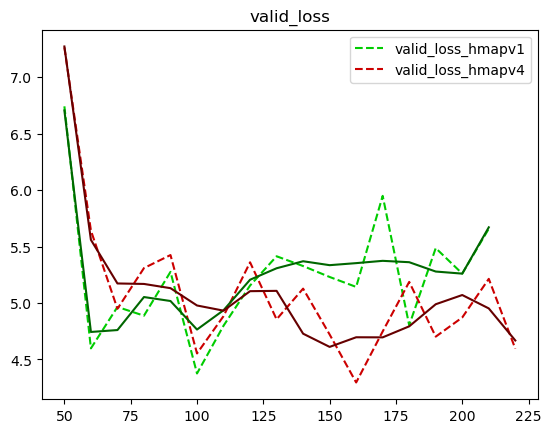

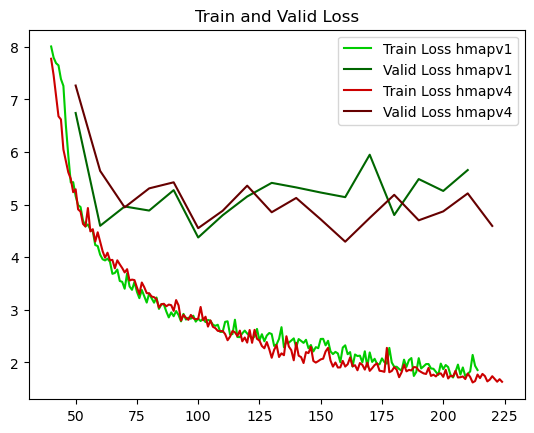

In [3]:
from IPython import embed
from time import time
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


def plot_contrast(loss_1, loss_1_x, 
                  loss_2, loss_2_x, 
                  label_1='label 1', label_2='label 2', graph_name='name',
                  window_length=5, polyorder=2):
    plt.plot(loss_1_x, loss_1, "--", color=(0, 0.8, 0), label=label_1)
    smoothed_y_1 = savgol_filter(loss_1, window_length=window_length, polyorder=polyorder)
    plt.plot(loss_2_x, loss_2, "--", color=(0.8, 0, 0), label=label_2)
    smoothed_y_2 = savgol_filter(loss_2, window_length=window_length, polyorder=polyorder)
    plt.plot(loss_1_x, smoothed_y_1, '-', color=(0, 0.4, 0))
    plt.plot(loss_2_x, smoothed_y_2, '-', color=(0.4, 0, 0))
    plt.title(graph_name)
    plt.legend()
    plt.show()


def plot_loss(log_file_path, log_file_path_5101, save_frequency, contrast=None):
    train_loss = []
    valid_loss = []
    whd_Loss = []
    r_Loss = []
    hmap_Loss = []
    train_loss_x = []
    valid_loss_x = []
    whd_Loss_x = []
    r_Loss_x = []
    hmap_Loss_x = []

    train_loss_5101 = []
    valid_loss_5101 = []
    whd_Loss_5101 = []
    r_Loss_5101 = []
    hmap_Loss_5101 = []
    train_loss_5101_x = []
    valid_loss_5101_x = []
    whd_Loss_5101_x = []
    r_Loss_5101_x = []
    hmap_Loss_5101_x = []

    with open(log_file_path, 'r') as f:
        for line in f:
            if 'train_Loss' in line:
                train_loss.append(float(line.split('train_Loss: ')[1]))
                train_loss_x.append(float(line.split('Epoch: ')[1].split(',')[0]))
            elif 'valid_Loss' in line :
                valid_loss.append(float(line.split('valid_Loss: ')[1]))
                valid_loss_x.append(float(line.split('Epoch: ')[1].split(',')[0]))
            elif 'whd_Loss' in line and 'valid' not in line:
                whd_Loss.append(float(line.split('whd_Loss: ')[1]))
                whd_Loss_x.append(float(line.split('Epoch: ')[1].split(',')[0]))
            elif 'r_Loss' in line and 'valid' not in line:
                r_Loss.append(float(line.split('r_Loss: ')[1]))
                r_Loss_x.append(float(line.split('Epoch: ')[1].split(',')[0]))
            elif 'hmap_Loss' in line and 'valid' not in line:
                hmap_Loss.append(float(line.split('hmap_Loss: ')[1]))
                hmap_Loss_x.append(float(line.split('Epoch: ')[1].split(',')[0]))

    if contrast != None:
        with open(log_file_path_5101, 'r') as f_5101:
            for line in f_5101:
                if 'train_Loss' in line:
                    train_loss_5101.append(float(line.split('train_Loss: ')[1]))
                    train_loss_5101_x.append(float(line.split('Epoch: ')[1].split(',')[0]))
                elif 'valid_Loss' in line :
                    valid_loss_5101.append(float(line.split('valid_Loss: ')[1]))
                    valid_loss_5101_x.append(float(line.split('Epoch: ')[1].split(',')[0]))
                elif 'whd_Loss' in line and 'valid' not in line:
                    whd_Loss_5101.append(float(line.split('whd_Loss: ')[1]))
                    whd_Loss_5101_x.append(float(line.split('Epoch: ')[1].split(',')[0]))
                elif 'r_Loss' in line and 'valid' not in line:
                    r_Loss_5101.append(float(line.split('r_Loss: ')[1]))
                    r_Loss_5101_x.append(float(line.split('Epoch: ')[1].split(',')[0]))
                elif 'hmap_Loss' in line and 'valid' not in line:
                    hmap_Loss_5101.append(float(line.split('hmap_Loss: ')[1]))
                    hmap_Loss_5101_x.append(float(line.split('Epoch: ')[1].split(',')[0]))

        # train_loss_5101 =  [x - 4 * y for x, y in zip(train_loss_5101, hmap_Loss_5101)]



    plot_contrast(train_loss, train_loss_x, train_loss_5101, train_loss_5101_x, 
                  'train_loss_hmapv1', 'train_loss_hmapv4', 'train_loss',
                  window_length=40, polyorder=3)
    plot_contrast(hmap_Loss, hmap_Loss_x, hmap_Loss_5101, hmap_Loss_5101_x,
                  'hmap_Loss_hmapv1', 'hmap_Loss_hmapv4', 'hmap_Loss',
                  window_length=100, polyorder=5)
    plot_contrast(whd_Loss, whd_Loss_x, whd_Loss_5101, whd_Loss_5101_x, 
                  'whd_Loss_hmapv1', 'whd_Loss_hmapv4', 'whd_Loss',
                  window_length=100, polyorder=5)
    plot_contrast(r_Loss, r_Loss_x, r_Loss_5101, r_Loss_5101_x, 
                  'r_Loss_hmapv1', 'r_Loss_hmapv4', 'r_Loss',
                  window_length=100, polyorder=5)
    plot_contrast(valid_loss, valid_loss_x, valid_loss_5101, valid_loss_5101_x,
                  'valid_loss_hmapv1', 'valid_loss_hmapv4', 'valid_loss',
                  window_length=10, polyorder=5)


    plt.plot(train_loss_x, train_loss, color=(0, 0.8, 0), label='Train Loss hmapv1')
    plt.plot(valid_loss_x, valid_loss, color=(0, 0.4, 0), label='Valid Loss hmapv1')

    plt.plot(train_loss_5101_x, train_loss_5101, color=(0.8, 0, 0), label='Train Loss hmapv4')
    plt.plot(valid_loss_5101_x, valid_loss_5101, color=(0.4, 0, 0), label='Valid Loss hmapv4')

    plt.legend()
    plt.title('Train and Valid Loss')
    plt.show()


if __name__ == '__main__':
    # csv_dir = 'D:\Work_file\det_LUNA16_data\\annotations_pathcoord_noras.csv'
    # name_list = read_names_from_csv(csv_dir)
    # data_propre()
    # embed()
    plot_loss('training.log', 'training_v2.log', 10, contrast=False)
    # csv_dir = 'D:\Work_file\det_LUNA16_data\\annotations_pathcoord_noras.csv'
    # # csv_dir = 'D:\Work_file\det_LUNA16_data\\annotations_pathcoord_noras.csv'
    # name_list = read_names_from_csv(csv_dir)
    # for name in tqdm(name_list):
    #     # print(name)
    #     path = name2path(name)



In [13]:
model = "/public_bme/data/xiongjl/det/save/0824_v3_res101_crop256_10-1-01_hmapv3-80.pt"
print(model.split('/')[-1].split('.pt')[-2][8:])

res101_crop256_10-1-01_hmapv3-80
